### 1. Data
### 2. Data Preprocessing
### 3. Data analysis
### 4. Train Test split
### 5. ML Model
### 6. Evaluation

# **Handling Missing values**

### methods to Handle missing values

*   Imputation - filling the missing values with mean, mode , or median values
*   Dropping - removing those rows

In [ ]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# reading the df
df = pd.read_csv("/content/Placement_Dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


In [ ]:
print(df.head())

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [ ]:
# finding the missing values
print(df.isnull().sum())

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


### filling missing values  using sklear.imputer with central tendencies such as

1.   mean
2.   median
3. mode



### analyze the distribution of data in the salary column

<ipython-input-8-b5b96537b28d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'])


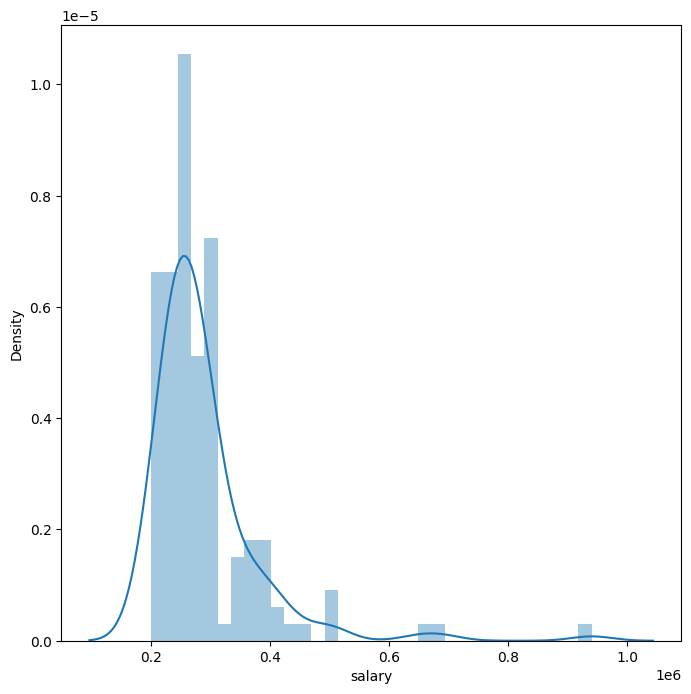

In [ ]:
fig , ax = plt.subplots(figsize=(8,8))
sns.distplot(df['salary'])
plt.show()

### Replace the missing values with the median values without the library

In [ ]:
df['salary'].fillna(df['salary'].median(), inplace=True)

<ipython-input-9-dc843e7c6480>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(df['salary'].median(), inplace=True)


### using sklean.impute library

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['salary'] = imputer.fit_transform(df[['salary']])

In [ ]:
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


### to drop the missing values

In [ ]:
temp_df = df
temp_df = temp_df.dropna(how='any')

# **Data standardization**

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# loading the dataset
dataset = sklearn.datasets.load_breast_cancer()


### #sklearn dataset returns bunch in which data = [data] , feature_names = [columns] , target = [label]

In [ ]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

### loading sklearn bunch data into pandas df

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x = df.values
y = dataset.target

In [ ]:
print(x)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

## **Splitting the data into train and test data**

In [ ]:

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,train_size=0.8,random_state=1)


In [ ]:
print(x_test)
print(y_test)

print(x_test.shape)
print(y_test.shape)

[[1.469e+01 1.398e+01 9.822e+01 ... 1.108e-01 2.827e-01 9.208e-02]
 [1.317e+01 1.866e+01 8.598e+01 ... 2.088e-01 3.900e-01 1.179e-01]
 [1.295e+01 1.602e+01 8.314e+01 ... 1.056e-01 3.380e-01 9.584e-02]
 ...
 [9.029e+00 1.733e+01 5.879e+01 ... 1.750e-01 4.228e-01 1.175e-01]
 [1.453e+01 1.934e+01 9.425e+01 ... 9.594e-02 2.471e-01 7.463e-02]
 [1.378e+01 1.579e+01 8.837e+01 ... 3.312e-02 1.859e-01 6.810e-02]]
[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1]
(114, 30)
(114,)


In [ ]:
print(x_train)
print(y_train)

print(x_train.shape)
print(y_train.shape)

[[1.799e+01 2.066e+01 1.178e+02 ... 1.974e-01 3.060e-01 8.503e-02]
 [2.029e+01 1.434e+01 1.351e+02 ... 1.625e-01 2.364e-01 7.678e-02]
 [9.000e+00 1.440e+01 5.636e+01 ... 1.389e-02 2.991e-01 7.804e-02]
 ...
 [1.720e+01 2.452e+01 1.142e+02 ... 1.899e-01 3.313e-01 1.339e-01]
 [1.403e+01 2.125e+01 8.979e+01 ... 7.963e-02 2.226e-01 7.617e-02]
 [1.303e+01 1.842e+01 8.261e+01 ... 5.013e-02 1.987e-01 6.169e-02]]
[0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 

## standardization

In [ ]:
print(dataset.data.std())

228.29740508276657


In [ ]:
scaler = StandardScaler()

# it performs the z = (x-u)/n

#fit methods calculates the std for each numerical column
scaler.fit(x_train)

#tranform method replaces
x_train = scaler.transform(x_train)

In [ ]:
print(x_train)

[[ 1.0449852   0.29708512  1.01044815 ...  1.21839781  0.29811854
   0.08380738]
 [ 1.68141074 -1.14098169  1.70338066 ...  0.69716372 -0.88595033
  -0.41234747]
 [-1.44260855 -1.12732916 -1.4504636  ... -1.52233766  0.1807324
  -0.33657109]
 ...
 [ 0.82638686  1.17539807  0.86625411 ...  1.10638475  0.72853438
   3.02284824]
 [-0.05077356  0.43133503 -0.11146165 ... -0.54050588 -1.1207226
  -0.44903285]
 [-0.32748032 -0.21260945 -0.39904866 ... -0.98109057 -1.52732096
  -1.31985978]]


### we should only perform tranform on test data

In [ ]:
x_test = scaler.transform(x_test)

# **Label Encoding**

## converting the labels into numeric form

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd


### label encoding of breast cancer dataset

In [ ]:
df = pd.read_csv("/content/breast_cancer_data.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
#finding the count of different labels
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
# initialising the labelencoder object
labelEncoder = LabelEncoder()
labels = labelEncoder.fit_transform(df.diagnosis)
print(labels)

#we didnot mention which label should be 1 and
#other 0. so, it assigns based on alphabetical order

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

### 0 - represents benign
### 1 - represents malignant

In [ ]:
# appending the labels to the df
df["target"] = labels
print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  perimeter_worst  area_worst  smoothness_worst  compact

### label encoding iris dataset which has 3 labels

In [ ]:
iris_data = pd.read_csv("/content/iris_data.csv")
iris_data.head()
print(iris_data.Species.value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
labels = labelEncoder.fit_transform(iris_data.Species)
iris_data["target"] = labels
print(iris_data.head())
print(labels)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# **Splitting data into Train and Test**

In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [8]:
df = load_breast_cancer()
x = pd.DataFrame(df.data,columns = df.feature_names)
y = df.target

### Splitting data

In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=1)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [17]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# **Handling imbalanced dataset**

a dataset with an unequal class distribution

In [18]:
import pandas as pd
import numpy as np


In [20]:
#loading the data
df = pd.read_csv("/content/credit_data.csv")

In [21]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [28]:
# this is high imbalanced text and it produces wrong predictions
df["Class"].value_counts()

,count
Class,
0.0,160223
1.0,356


### seperating the legit and fraud transactions from the class

In [35]:
legit = df[ df.Class == 0]
fraud = df[ df.Class == 1]
print(fraud.shape)
print(legit.shape)

(356, 31)
(160223, 31)


# **Undersampling technique**

choosing a sample dataset from legit containing similar distibution of legit & fraud

* no of fraud -> 356

In [37]:
# sample method works on only pd dataframes which returns a n sized randome elements
legit_sample = legit.sample(n=356)
print(legit_sample.shape)

(356, 31)


# concatenate the 2 df

In [38]:
# axis = 0 , row wise
new_df = pd.concat([legit_sample,fraud],axis=0)

In [39]:
print(new_df.head())

           Time        V1        V2        V3        V4        V5        V6  \
150067  92477.0  1.985743 -0.515686 -0.368515  0.429290 -0.474173  0.236378   
119256  75386.0  1.426789 -1.123972  0.711296 -1.435743 -1.712770 -0.593631   
129959  79251.0 -1.370093  1.141372  1.943505 -1.027068  0.097192 -1.592963   
41086   40528.0  1.179460  0.347255  0.460538  1.057391 -0.100262 -0.394417   
66656   52158.0  0.845534 -0.708998  0.714626  0.525801 -0.989718 -0.102807   

              V7        V8        V9  ...       V21       V22       V23  \
150067 -0.966257  0.154292  2.542697  ...  0.006052  0.396231  0.094647   
119256 -1.189354 -0.006754 -1.931823  ... -0.312457 -0.645220  0.157686   
129959  1.063040 -0.227325  0.282849  ... -0.358565 -0.956346 -0.186503   
41086   0.111119 -0.110569 -0.111322  ... -0.010589  0.070684 -0.007683   
66656  -0.389243  0.127152  0.339346  ...  0.129864 -0.091715 -0.145870   

             V24       V25       V26       V27       V28  Amount  Class  


In [40]:
print(new_df.tail())

            Time        V1        V2        V3        V4        V5        V6  \
156990  109298.0 -1.000611  3.346850 -5.534491  6.835802 -0.299803  0.095951   
157585  110087.0  1.934946  0.650678 -0.286957  3.987828  0.316052 -0.099449   
157868  110547.0 -1.532810  2.232752 -5.923100  3.386708 -0.153443 -1.419748   
157871  110552.0 -2.450367  2.107729 -5.140663  1.411304 -1.690780 -0.736427   
157918  110617.0 -1.101035 -1.674928 -0.573388  5.617556  0.765556  0.440607   

              V7        V8        V9  ...       V21       V22       V23  \
156990 -2.440419  1.286301 -2.766438  ...  0.439757 -0.694099  0.299660   
157585 -0.021483 -0.172327  0.508730  ... -0.173602 -0.190974  0.219976   
157868 -3.878576  1.444656 -1.465542  ...  0.632505 -0.070838 -0.490291   
157871 -3.657946  1.944906 -0.788388  ...  0.800538  0.364617  0.233608   
157918  1.934740 -1.019788 -0.193244  ... -0.412526 -0.208823  0.344833   

             V24       V25       V26       V27       V28  Amount  Cl

In [42]:
new_df["Class"].value_counts()

,count
Class,
0.0,356
1.0,356
